Descriptive Statistics for Salary:
count    20.000000
mean      0.590516
std       0.315465
min       0.000000
25%       0.393632
50%       0.578974
75%       0.879591
max       1.000000
Name: Salary, dtype: float64


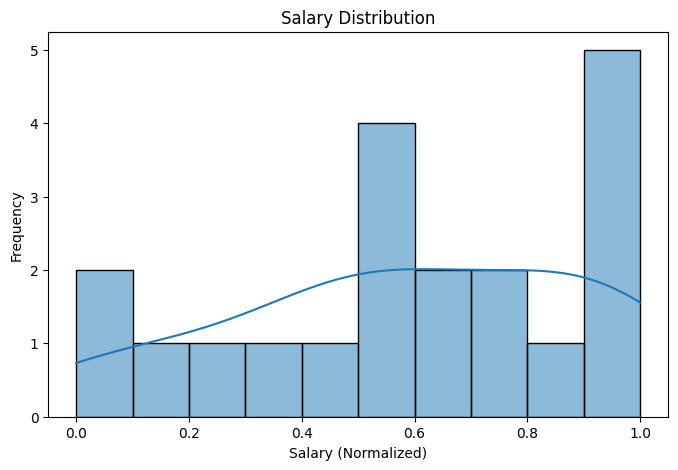

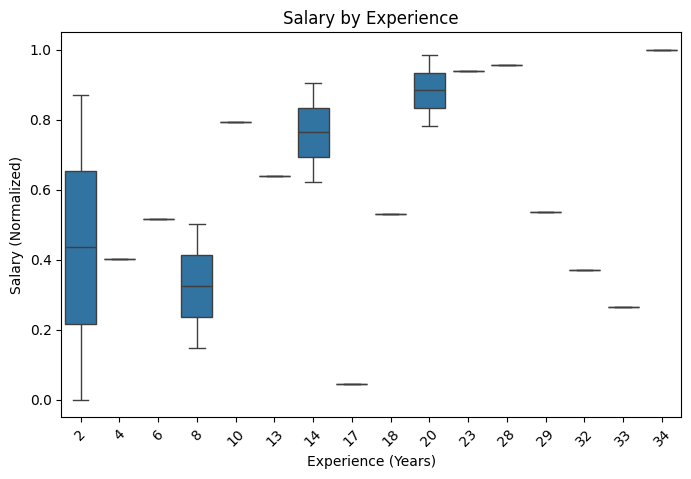


Correlation Matrix:
                    Employee_ID       Age  Experience    Salary  \
Employee_ID            1.000000  0.250392    0.329976  0.321080   
Age                    0.250392  1.000000    0.246742 -0.249330   
Experience             0.329976  0.246742    1.000000  0.250745   
Salary                 0.321080 -0.249330    0.250745  1.000000   
Department_Finance    -0.520266 -0.144971   -0.208687 -0.139428   
Department_HR         -0.035400  0.051186   -0.350808 -0.175905   
Department_IT          0.390488  0.160612    0.456428  0.185123   
Department_Sales       0.157846 -0.102597    0.161581  0.173036   

                    Department_Finance  Department_HR  Department_IT  \
Employee_ID                  -0.520266      -0.035400       0.390488   
Age                          -0.144971       0.051186       0.160612   
Experience                   -0.208687      -0.350808       0.456428   
Salary                       -0.139428      -0.175905       0.185123   
Department_Fina

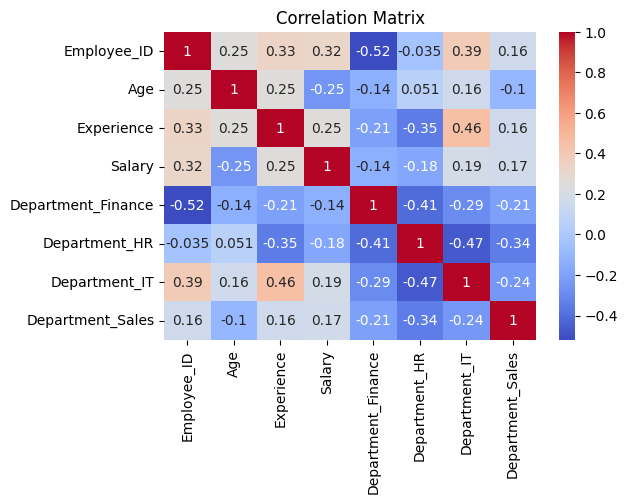


Model Performance Metrics:
R-squared: -0.11402065971199948
Mean Absolute Error (MAE): 0.3193200204673918
Mean Squared Error (MSE): 0.13737118072140445


In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Step 1: Create a dataset for employee salary analysis
data = {
    'Employee_ID': range(1, 21),
    'Age': [23, 28, 37, 23, 55, 32, 58, 46, 53, 58, 29, 46, 49, 57, 53, 57, 43, 29, 23, 50],
    'Department': ['Finance', 'Finance', 'HR', 'HR', 'IT', 'Sales', 'Finance', 'Finance', 'HR', 'HR',
                   'HR', 'HR', 'IT', 'Sales', 'IT', 'HR', 'HR', 'Sales', 'IT', 'IT'],
    'Experience': [8, 2, 8, 23, 29, 10, 6, 34, 2, 17, 13, 14, 20, 32, 33, 4, 18, 20, 14, 28],
    'Salary': [93563, 41742, 56905, 138397, 96879, 123436, 94781, 144637, 131361, 46377, 107468, 105752, 122125, 79949, 69121, 83010, 96227, 143220, 134907, 140206]
}

# Convert the data into a pandas DataFrame
employee_data = pd.DataFrame(data)

# Step 2: Data Preprocessing

# Handle missing values (if any)
employee_data.dropna(subset=['Salary'], inplace=True)

# Encode categorical columns ('Department') using one-hot encoding
employee_data = pd.get_dummies(employee_data, columns=['Department'])

# Normalize salary using MinMaxScaler
scaler = MinMaxScaler()
employee_data['Salary'] = scaler.fit_transform(employee_data[['Salary']])

# Step 3: Exploratory Data Analysis (EDA)

# Descriptive statistics for salary
salary_stats = employee_data['Salary'].describe()
print("Descriptive Statistics for Salary:")
print(salary_stats)

# Salary distribution visualization
plt.figure(figsize=(8, 5))
sns.histplot(employee_data['Salary'], bins=10, kde=True)
plt.title("Salary Distribution")
plt.xlabel("Salary (Normalized)")
plt.ylabel("Frequency")
plt.show()

# Salary by Department
plt.figure(figsize=(8, 5))
sns.boxplot(x='Experience', y='Salary', data=employee_data)
plt.title("Salary by Experience")
plt.xlabel("Experience (Years)")
plt.ylabel("Salary (Normalized)")
plt.xticks(rotation=45)
plt.show()

# Step 4: Correlation Analysis

# Correlation matrix for numerical variables
correlation_matrix = employee_data.corr(numeric_only=True)
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Heatmap for correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Step 5: Linear Regression to predict Salary based on Experience

# Define features (X) and target (y)
X = employee_data[['Experience']]  # Feature
y = employee_data['Salary']  # Target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
r_squared = model.score(X_test, y_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("\nModel Performance Metrics:")
print("R-squared:", r_squared)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
